In [1]:
import os
import sys
root = os.path.split(os.getcwd())[0]
if root not in sys.path:
    sys.path.append(root)
!{sys.executable} -m pip install numpy pandas intervaltree matplotlib



You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
from strategy.data import RawData
from strategy.primitives import Pool, Token, Fee
pool = Pool(Token.WBTC, Token.WETH, Fee.MIDDLE)
raw = RawData.from_pool(pool)

Done


,c,c_inv,vol0,vol1,l,vol,fee
block_time,,,,,,,
2021-06-26,17.627674,0.056729,223.012116,2581.063079,39243.880583,6512.247899,195.367437
2021-06-27,17.876601,0.055939,510.589121,9432.273978,169829.323712,18559.872174,556.796165
2021-06-28,16.839203,0.059385,337.763748,12573.166426,56643.203808,18260.838684,547.825161
2021-06-29,16.400610,0.060973,394.073558,4691.754175,89876.817564,11154.801017,334.644031
2021-06-30,16.511300,0.060565,159.386285,4943.325796,178009.296934,7575.000510,227.250015


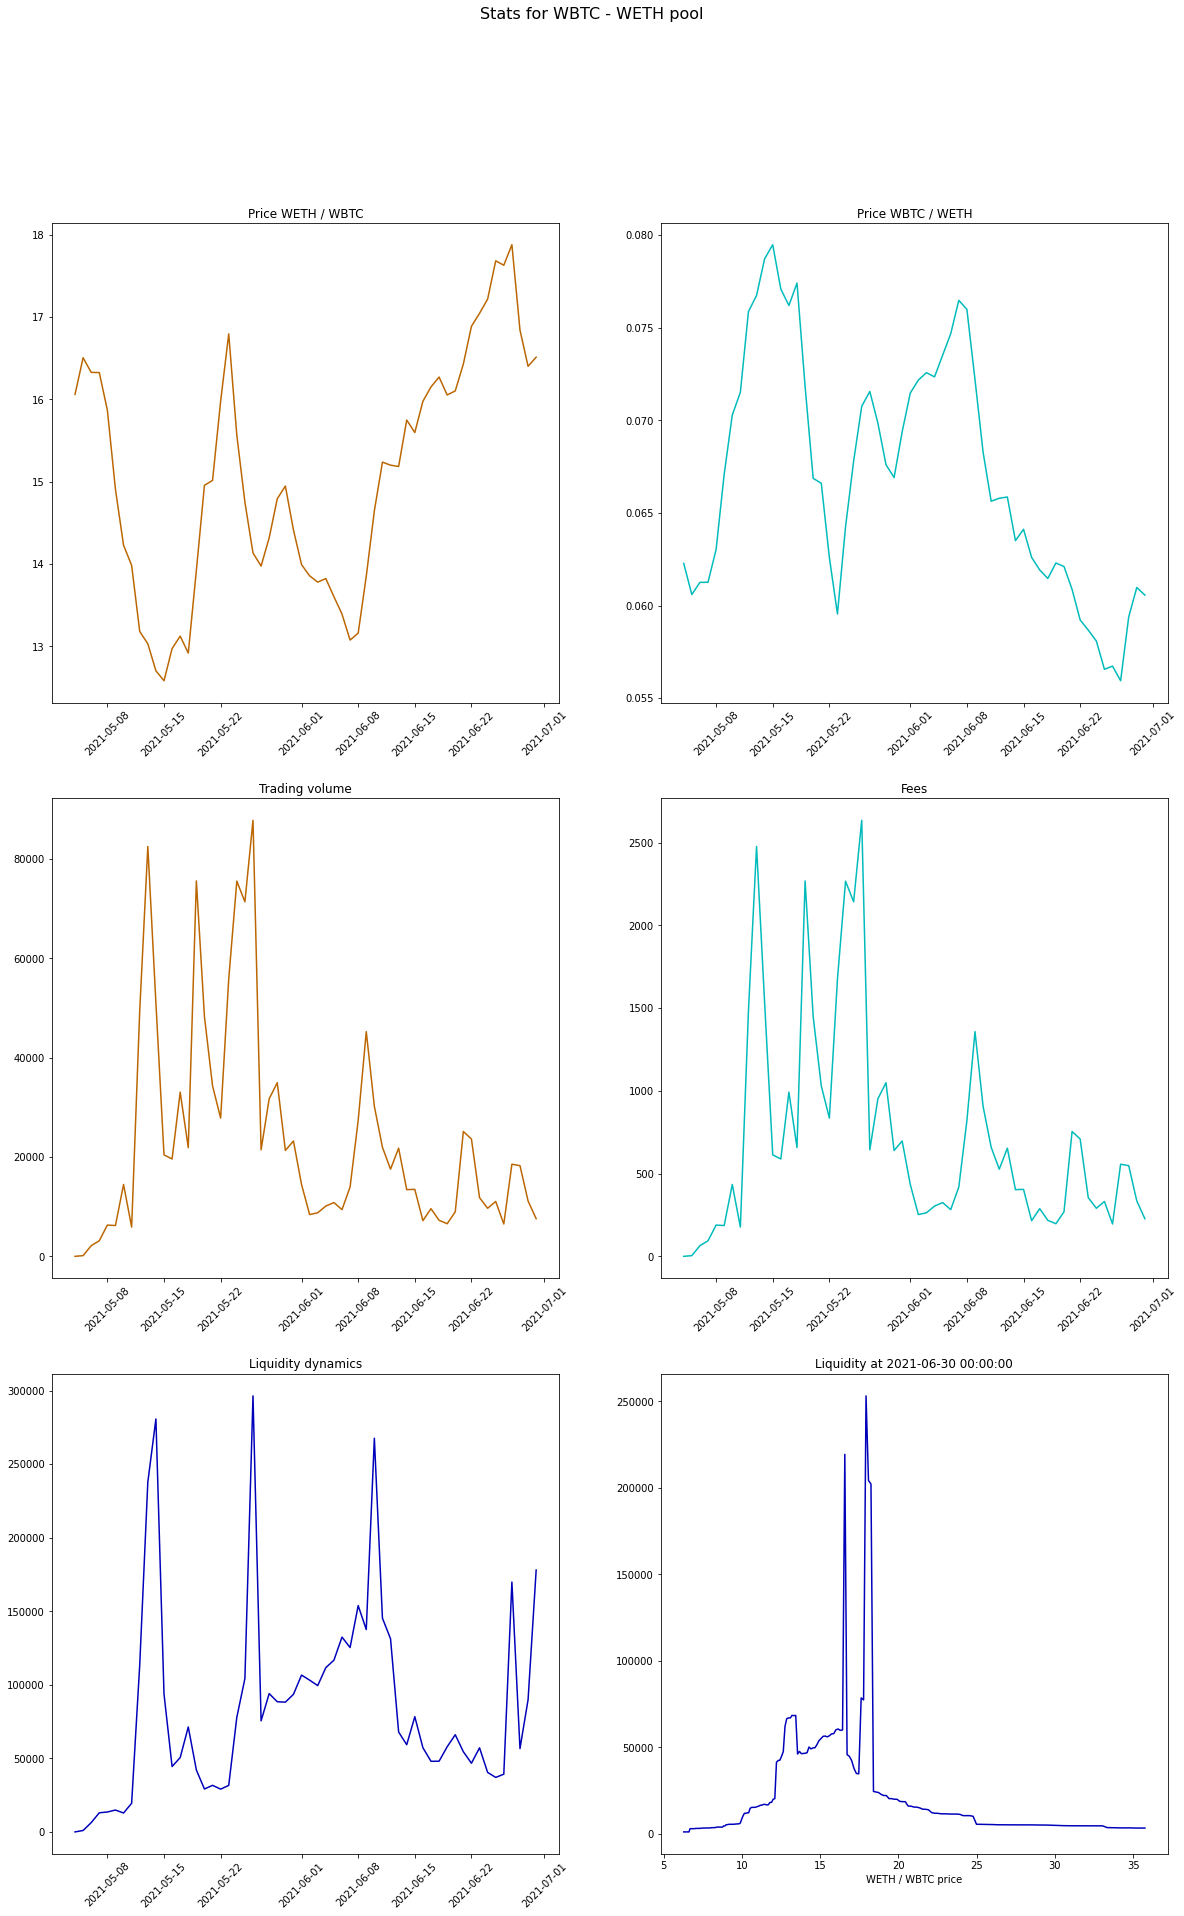

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from strategy.primitives import Pool, Frequency
from strategy.data import PoolData

p = PoolData.from_raw_data(raw, Frequency.DAY)
display(p.data.tail())
p.plot()


2021-06-21 00:00:00 16.428194346603096 48824.32684206282 258261.41177150537
2021-06-22 00:00:00 16.885907818070873 46519.12849310432 258536.22942076207
2021-06-23 00:00:00 17.043502243393913 40187.52480075857 258629.13020389318
2021-06-24 00:00:00 17.216234928819908 37724.23521639268 258729.973234173
2021-06-25 00:00:00 17.68078484655173 28644.407065802807 258996.2427282885
2021-06-26 00:00:00 17.627673721923227 33023.49797239367 258966.1571214096
2021-06-27 00:00:00 17.8766013850159 210381.87189316694 259106.39048073624
2021-06-28 00:00:00 16.839202843009826 35905.236334140776 258508.53057013426
2021-06-29 00:00:00 16.400610288109526 45514.791934974666 258244.60613726295
2021-06-30 00:00:00 16.511299618238073 216022.43879344364 258311.8737508298


,c,c_inv,vol0,vol1,l,vol,fee
block_time,,,,,,,
2021-06-20,16.101826,0.062105,158.929672,6403.007700,66072.176812,8962.065661,268.861970
2021-06-21,16.428194,0.060871,949.228501,9551.686219,54507.570301,25145.796514,754.373895
2021-06-22,16.885908,0.059221,802.574364,10076.215816,46699.498046,23628.412552,708.852377
2021-06-23,17.043502,0.058673,285.171188,6961.866176,57156.349847,11822.181954,354.665459
2021-06-24,17.216235,0.058085,343.920246,3756.737844,40456.886085,9677.749596,290.332488
2021-06-25,17.680785,0.056559,324.784991,5311.418893,37052.482367,11053.872445,331.616173
2021-06-26,17.627674,0.056729,223.012116,2581.063079,39243.880583,6512.247899,195.367437
2021-06-27,17.876601,0.055939,510.589121,9432.273978,169829.323712,18559.872174,556.796165
2021-06-28,16.839203,0.059385,337.763748,12573.166426,56643.203808,18260.838684,547.825161


2021-06-21 00:00:00 16.428194346603096 48824.32684206282 258261.41177150537


48824.32684206282

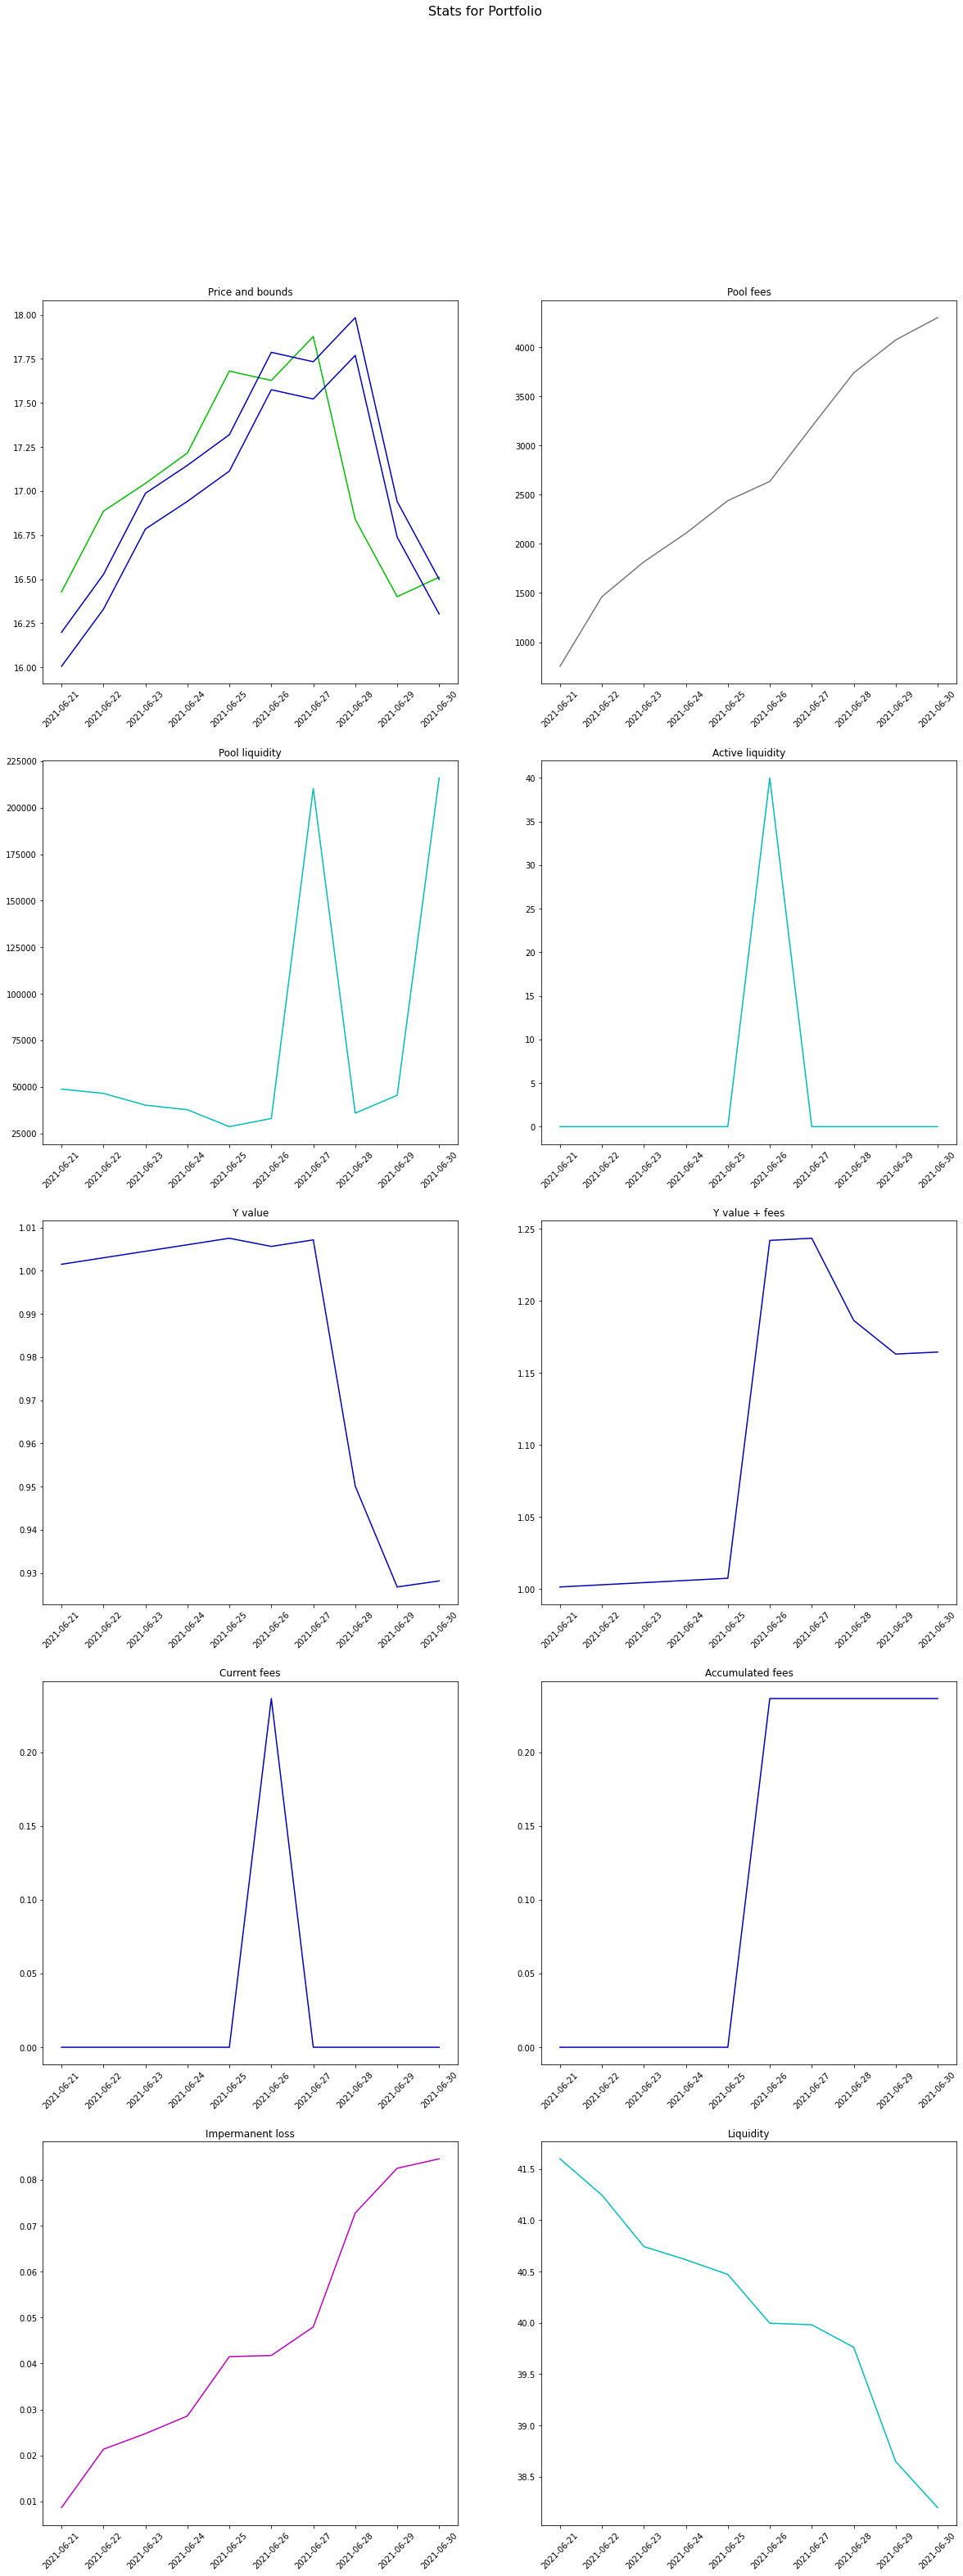

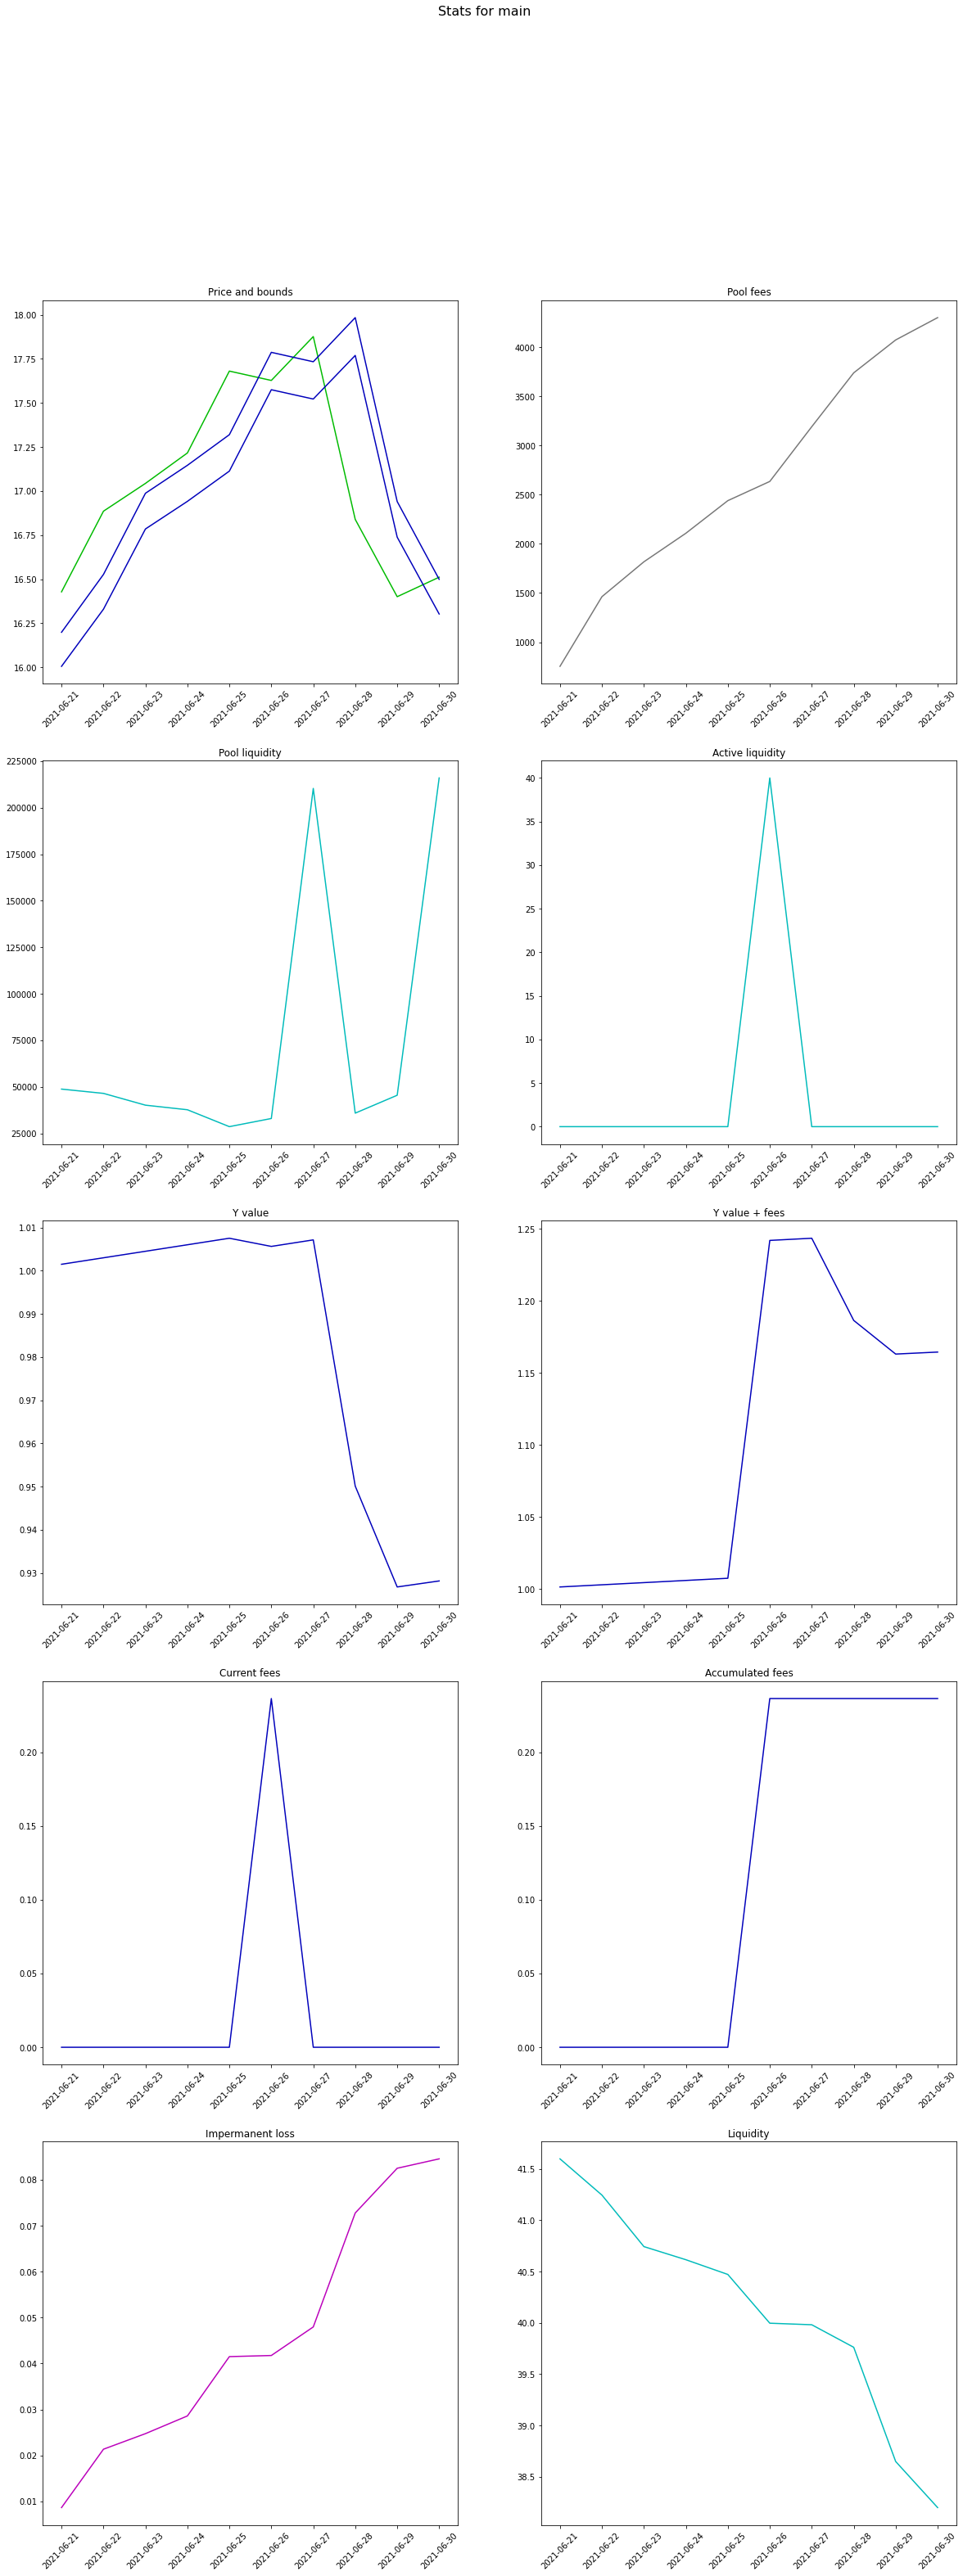

In [7]:
from strategy.portfolio import AbstractStrategy, Position
from strategy.backtest import Backtest
from strategy.data import PoolData
from datetime import datetime
from typing import Callable

class RebalanceStrategy(AbstractStrategy):        
    def rebalance(
        self,
        t: datetime,
        c: float,
        vol: float,
        l: Callable[[float], float],
        pool_data: PoolData,
    ):
        if not self.portfolio.position("main"):
            self.portfolio.add_position(Position(id="main", a = c / 1.0001 ** 60, b = c * 1.0001 ** 60))
            pos = self.portfolio.position("main")
            pos.deposit(c, 1)
        else:
            pos = self.portfolio.position("main")
            pos.set_a(c / 1.0001 ** 60, c)
            pos.set_b(c * 1.0001 ** 60, c)
# display(raw.mints)
from time import time
t = time()
backtest = Backtest(RebalanceStrategy())
data = p["2021-06-20":"2021-06-30"]

# data = p
backtest.run(data)
# print(time() - t)
backtest.plot(20, 50)
display(data.data)

data.liquidity(datetime(2021,6,21), 16.428194346603096)